In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("supply_chain_data.csv")

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


#

### Q1. Which product type generated highest revenue

In [11]:
df_tot_revenue=df.groupby('Product type').agg(Total_Revenue=('Revenue generated','sum')).reset_index()

In [14]:
df_tot_revenue['Total_Revenue']=df_tot_revenue['Total_Revenue'].round(0)

In [15]:
df_tot_revenue

,Product type,Total_Revenue
0,cosmetics,161521.0
1,haircare,174455.0
2,skincare,241628.0


In [16]:
import seaborn as sns

<Axes: xlabel='Product type', ylabel='Total_Revenue'>

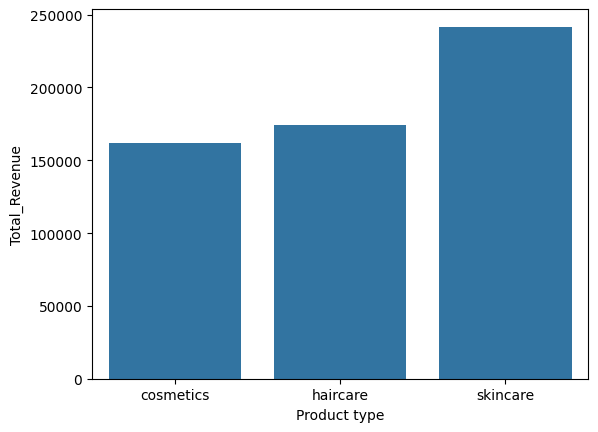

In [17]:
sns.barplot(df_tot_revenue,x='Product type',y='Total_Revenue')

/var/folders/v6/b6p52t217dl0zncsqc790k4m0000gn/T/ipykernel_20732/2499861219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


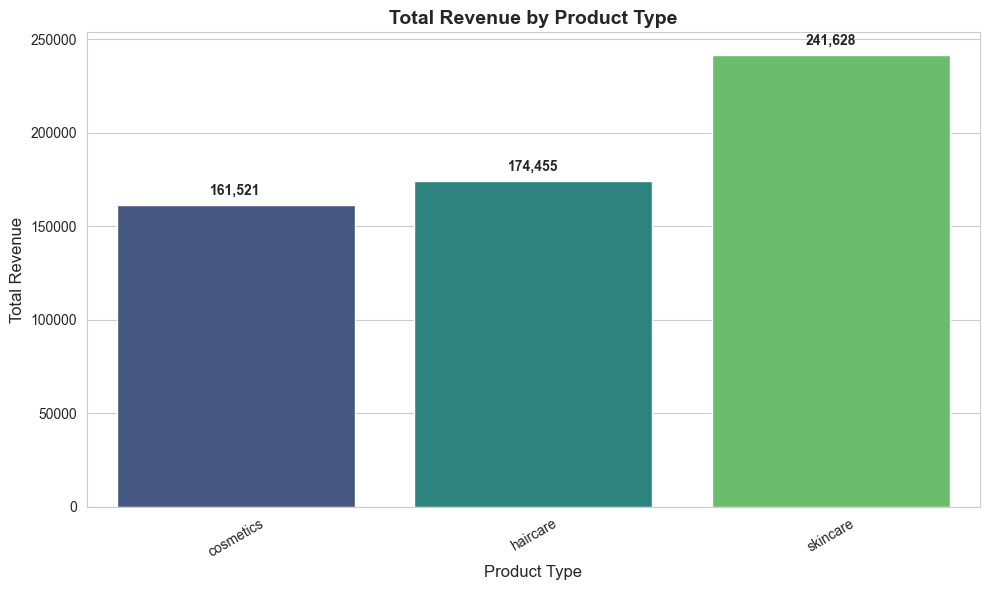

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    data=df_tot_revenue,
    x='Product type',
    y='Total_Revenue',
    palette='viridis'
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Beautification
ax.set_title('Total Revenue by Product Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Product Type', fontsize=12)
ax.set_ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()


### Answer: Highest revenue is generated from Skin care

### Q4. Price vs Sales: Do higher prices reduce sales?

<Axes: xlabel='Price', ylabel='Number of products sold'>

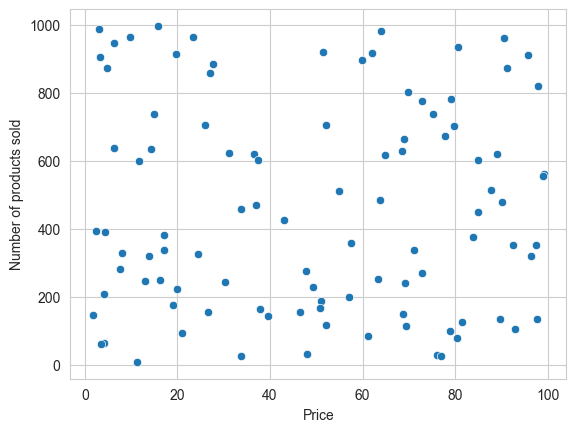

In [22]:
sns.scatterplot(data=df,x='Price',y='Number of products sold')

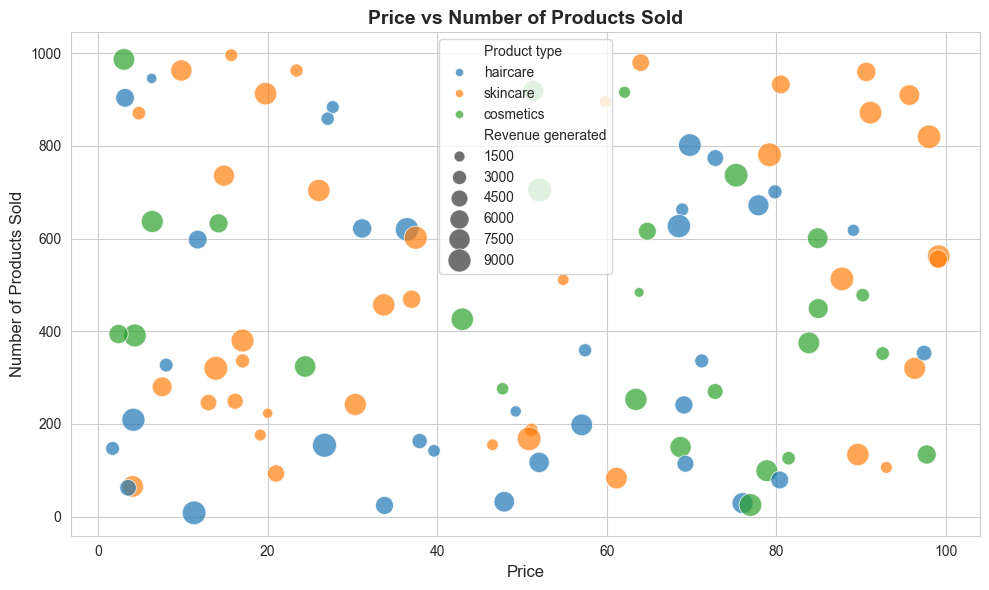

In [23]:
# Style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot
ax = sns.scatterplot(
    data=df,
    x='Price',
    y='Number of products sold',
    hue='Product type',        # optional but very useful
    size='Revenue generated',  # optional – shows business impact
    sizes=(50, 300),
    alpha=0.7,
    palette='tab10'
)

# Titles and labels
ax.set_title('Price vs Number of Products Sold', fontsize=14, fontweight='bold')
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Number of Products Sold', fontsize=12)

plt.tight_layout()
plt.show()

### Answer: The above scatter plot shows there is no direct relation between number of products sold and the price.

### Q3. Which suppliers have the longest lead times?

In [24]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [26]:
df[['Supplier name','Lead time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Supplier name  100 non-null    object
 1   Lead time      100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [30]:
df_sup_lt=df.groupby('Supplier name').agg(Supplier_Avg_Lead_Time=("Lead time","mean")).reset_index()

In [33]:
df_sup_lt['Supplier_Avg_Lead_Time']=df_sup_lt['Supplier_Avg_Lead_Time'].round(2)

In [34]:
df_sup_lt

,Supplier name,Supplier_Avg_Lead_Time
0,Supplier 1,14.78
1,Supplier 2,18.55
2,Supplier 3,20.13
3,Supplier 4,15.22
4,Supplier 5,18.06


<Axes: xlabel='Supplier name', ylabel='Supplier_Avg_Lead_Time'>

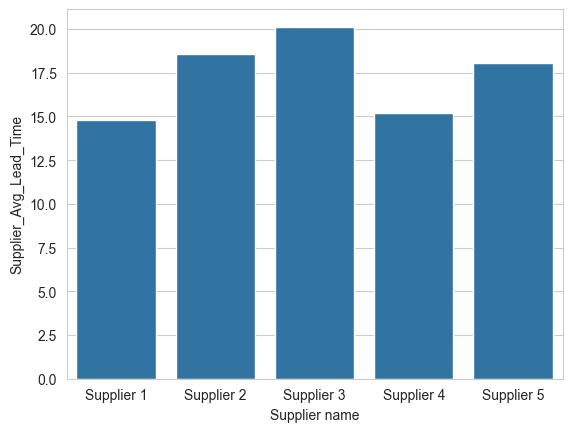

In [35]:
sns.barplot(df_sup_lt,x='Supplier name',y='Supplier_Avg_Lead_Time')

/var/folders/v6/b6p52t217dl0zncsqc790k4m0000gn/T/ipykernel_20732/2075685204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


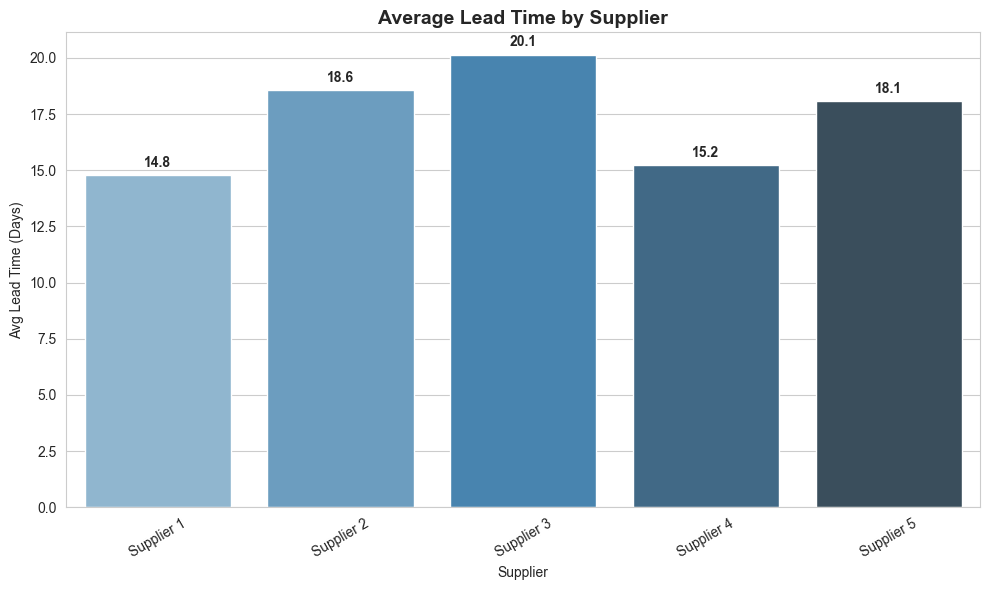

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_sup_lt,
    x='Supplier name',
    y='Supplier_Avg_Lead_Time',
    palette='Blues_d'
)

# Value labels on top
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        xytext=(0, 4),
        textcoords='offset points'
    )

ax.set_title('Average Lead Time by Supplier', fontsize=14, fontweight='bold')
ax.set_xlabel('Supplier')
ax.set_ylabel('Avg Lead Time (Days)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Answer) The bar graph shows that the highest average lead time is taken by Supplier 3

### Q4. Is there a mismatch between stock levels and demand?

In [38]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

<Axes: xlabel='Stock levels', ylabel='Number of products sold'>

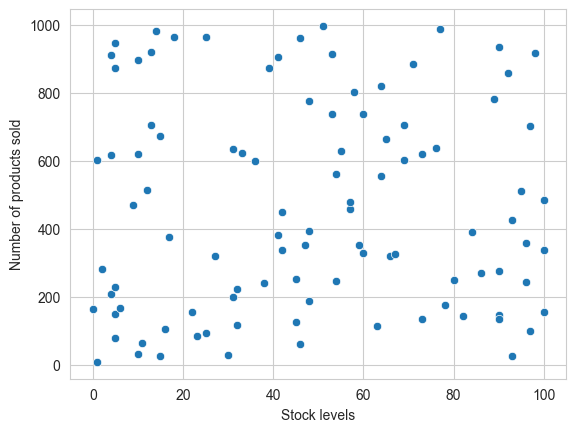

In [40]:
sns.scatterplot(df,x='Stock levels',y='Number of products sold')

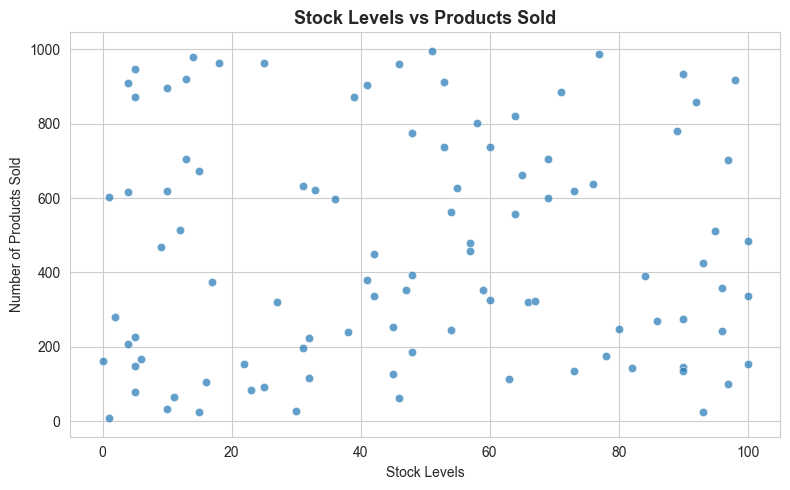

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.scatterplot(
    data=df,
    x='Stock levels',
    y='Number of products sold',
    alpha=0.7
)

ax.set_title('Stock Levels vs Products Sold', fontsize=13, fontweight='bold')
ax.set_xlabel('Stock Levels')
ax.set_ylabel('Number of Products Sold')

plt.tight_layout()
plt.show()

### Answer) conclusion: The quadrant where the number of products sold is less but high stocks available, that is a risk, needs to be looks into and stock to be sent back to vendor or consumed asap

### Q5. Which suppliers contribute to higher defect rates?

<Axes: xlabel='Supplier name', ylabel='Defect rates'>

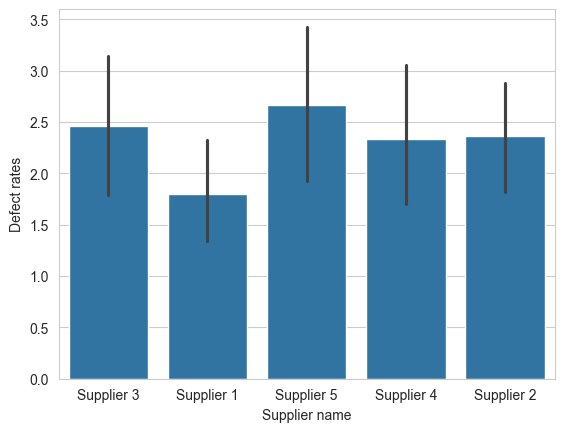

In [46]:
sns.barplot(df,x='Supplier name',y='Defect rates')

/var/folders/v6/b6p52t217dl0zncsqc790k4m0000gn/T/ipykernel_20732/2772864058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


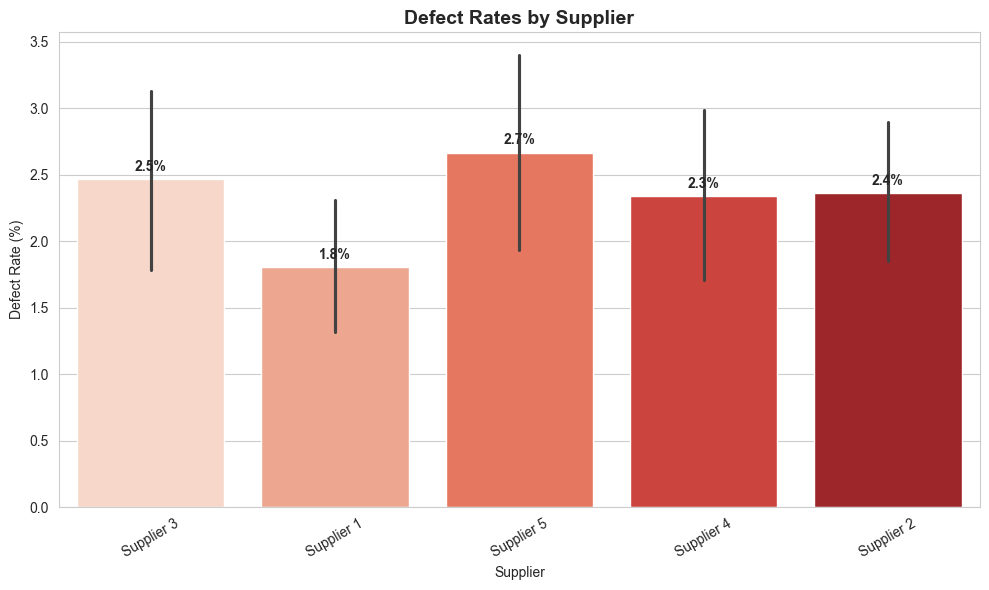

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df,
    x='Supplier name',
    y='Defect rates',
    palette='Reds'
)

# Add value labels on top (as %)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        xytext=(0, 4),
        textcoords='offset points'
    )

# Labels & title
ax.set_title('Defect Rates by Supplier', fontsize=14, fontweight='bold')
ax.set_xlabel('Supplier')
ax.set_ylabel('Defect Rate (%)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### figure shows Supplier 5 has highest defect rate with 2.7%

### 6. Which transportation mode is most cost-effective?

In [62]:
df['Transportation modes'].value_counts()

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

In [52]:
df_tx_cost=df.groupby("Transportation modes").agg(Avg_transportation_cost=("Costs","mean")).reset_index()

In [54]:
df_tx_cost['Avg_transportation_cost']=df_tx_cost['Avg_transportation_cost'].round(0)

In [55]:
df_tx_cost

,Transportation modes,Avg_transportation_cost
0,Air,562.0
1,Rail,542.0
2,Road,553.0
3,Sea,418.0


<Axes: xlabel='Transportation modes', ylabel='Avg_transportation_cost'>

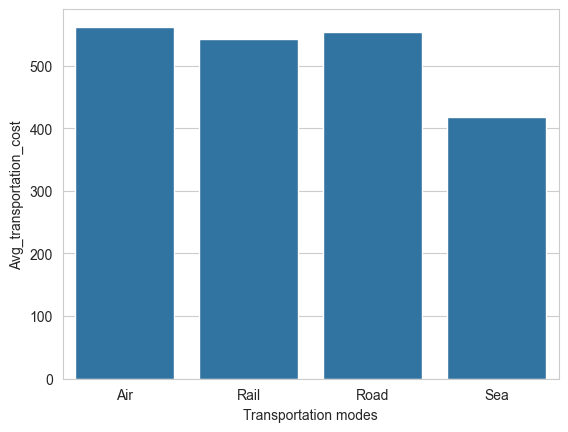

In [56]:
sns.barplot(df_tx_cost,x='Transportation modes',y='Avg_transportation_cost')

In [57]:
import plotly.express as px

# Sort for better readability
df_tx_cost_sorted = df_tx_cost.sort_values(
    by='Avg_transportation_cost',
    ascending=False
)

fig = px.bar(
    df_tx_cost_sorted,
    x='Transportation modes',
    y='Avg_transportation_cost',
    text='Avg_transportation_cost',
    title='Average Transportation Cost by Mode',
    color='Avg_transportation_cost',
    color_continuous_scale='Blues'
)

# Beautification
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

fig.update_layout(
    xaxis_title='Transportation Mode',
    yaxis_title='Average Transportation Cost',
    title_font=dict(size=18),
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    yaxis=dict(showgrid=True),
    xaxis=dict(tickangle=-30),
    plot_bgcolor='white'
)

fig.show()


### The above graph shows transportation by the sea is cheapest

In [63]:
## Next

### 7. Shipping carrier performance: cost vs speed

<Axes: xlabel='Shipping times', ylabel='Shipping costs'>

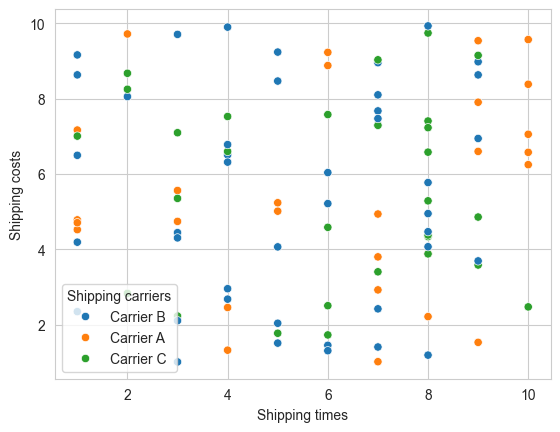

In [69]:
sns.scatterplot(df,x='Shipping times',y='Shipping costs',hue='Shipping carriers')

In [70]:
fig = px.scatter(
    df,
    x='Shipping times',
    y='Shipping costs',
    color='Shipping carriers',
    size='Shipping costs',  # optional, to emphasize expensive shipments
    hover_data=['Shipping carriers', 'Shipping times', 'Shipping costs'],
    title='Shipping Times vs Shipping Costs by Carrier',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Beautification
fig.update_traces(marker=dict(size=12, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Shipping Times (Days)',
    yaxis_title='Shipping Costs ($)',
    title_font=dict(size=18),
    plot_bgcolor='white'
)

fig.show()

In [71]:
4

4

In [72]:
## Next

### Q8. Identify high-risk SKUs

In [73]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


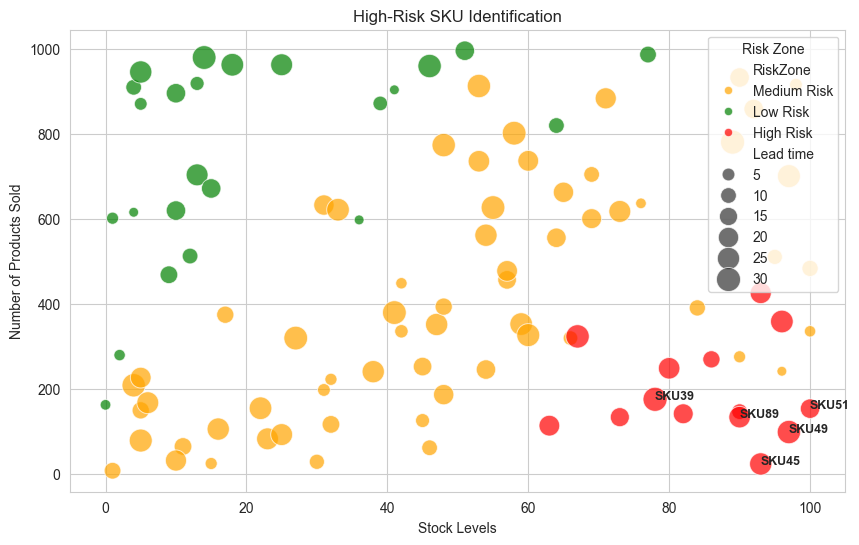

In [74]:
# 📦 High-Risk SKU Identification

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: assuming your dataset is loaded as df
# Columns used: 'SKU', 'Stock levels', 'Number of products sold', 'Lead time'

# --- Step 1: Standardize metrics ---
df['Stock_norm'] = (df['Stock levels'] - df['Stock levels'].min()) / (df['Stock levels'].max() - df['Stock levels'].min())
df['Sales_norm'] = (df['Number of products sold'] - df['Number of products sold'].min()) / (df['Number of products sold'].max() - df['Number of products sold'].min())
df['LeadTime_norm'] = (df['Lead time'] - df['Lead time'].min()) / (df['Lead time'].max() - df['Lead time'].min())

# --- Step 2: Calculate risk score ---
# High stock → high risk, Low sales → high risk, Long lead time → high risk
df['RiskScore'] = df['Stock_norm'] * 0.4 + (1 - df['Sales_norm']) * 0.4 + df['LeadTime_norm'] * 0.2

# Optional: classify into risk zones
def risk_zone(score):
    if score > 0.7:
        return "High Risk"
    elif score > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df['RiskZone'] = df['RiskScore'].apply(risk_zone)

# --- Step 3: Scatter plot ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Stock levels',
    y='Number of products sold',
    hue='RiskZone',
    size='Lead time',          # optional: bubble size = lead time
    sizes=(50, 300),
    palette={"Low Risk":"green","Medium Risk":"orange","High Risk":"red"},
    alpha=0.7
)

plt.title("High-Risk SKU Identification")
plt.xlabel("Stock Levels")
plt.ylabel("Number of Products Sold")
plt.legend(title="Risk Zone")
plt.grid(True)

# Optional: Annotate top high-risk SKUs
top_risk = df[df['RiskZone']=="High Risk"].sort_values('RiskScore', ascending=False)
for idx, row in top_risk.head(5).iterrows():
    plt.text(row['Stock levels'], row['Number of products sold'], row['SKU'], fontsize=9, fontweight='bold')

plt.show()


Q9. Which products should be prioritized for replenishment?

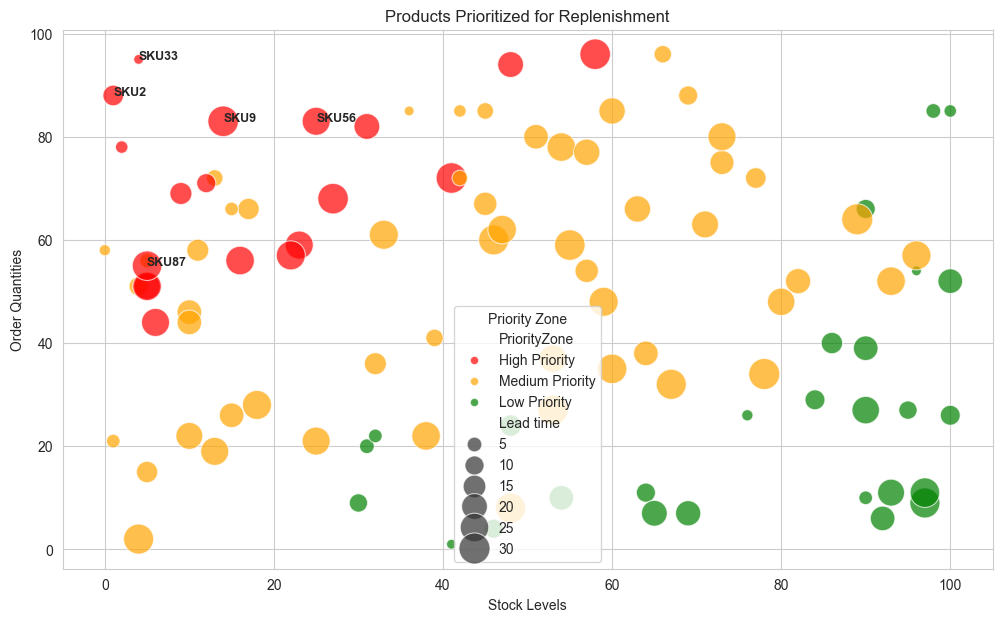

In [76]:
# 📦 Replenishment Priority Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: assuming your dataset is loaded as df
# Columns used: 'SKU', 'Stock levels', 'Order quantities', 'Lead time'

# --- Step 1: Calculate Replenishment Priority Score ---
# Logic: Low stock, High order demand, Long lead time → High priority
# Normalize values first to 0-1 scale
df['Stock_norm'] = 1 - ((df['Stock levels'] - df['Stock levels'].min()) / 
                        (df['Stock levels'].max() - df['Stock levels'].min()))
df['Order_norm'] = (df['Order quantities'] - df['Order quantities'].min()) / \
                   (df['Order quantities'].max() - df['Order quantities'].min())
df['LeadTime_norm'] = (df['Lead time'] - df['Lead time'].min()) / \
                      (df['Lead time'].max() - df['Lead time'].min())

# Weighted sum: Low stock (40%), High orders (40%), Long lead time (20%)
df['PriorityScore'] = df['Stock_norm']*0.4 + df['Order_norm']*0.4 + df['LeadTime_norm']*0.2

# Optional: categorize into priority levels
def priority_zone(score):
    if score > 0.7:
        return "High Priority"
    elif score > 0.4:
        return "Medium Priority"
    else:
        return "Low Priority"

df['PriorityZone'] = df['PriorityScore'].apply(priority_zone)

# --- Step 2: Bubble chart ---
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df,
    x='Stock levels',
    y='Order quantities',
    size='Lead time',   # Bubble size = lead time
    hue='PriorityZone',
    palette={"Low Priority":"green", "Medium Priority":"orange", "High Priority":"red"},
    sizes=(50, 500),
    alpha=0.7,
)

plt.title("Products Prioritized for Replenishment")
plt.xlabel("Stock Levels")
plt.ylabel("Order Quantities")
plt.grid(True)

# Optional: annotate top 5 high-priority SKUs
top_priority = df[df['PriorityZone']=="High Priority"].sort_values('PriorityScore', ascending=False)
for idx, row in top_priority.head(5).iterrows():
    plt.text(row['Stock levels'], row['Order quantities'], row['SKU'], fontsize=9, fontweight='bold')

plt.legend(title="Priority Zone")
plt.show()


In [77]:
#next

### top 5 products sold by quantity

In [78]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Routes,Costs,Stock_norm,Sales_norm,LeadTime_norm,RiskScore,RiskZone,Order_norm,PriorityScore,PriorityZone
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Route B,187.752075,0.42,0.803644,0.965517,0.503646,Medium Risk,1.000000,0.761103,High Priority
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Route B,503.065579,0.47,0.736842,0.758621,0.468987,Medium Risk,0.378947,0.491303,Medium Priority
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Route C,141.920282,0.99,0.000000,0.379310,0.479862,Medium Risk,0.915789,0.838178,High Priority
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Route A,254.776159,0.77,0.075911,0.793103,0.620256,Medium Risk,0.610526,0.710831,High Priority
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Route A,923.440632,0.95,0.873482,0.137931,0.098193,Low Risk,0.578947,0.639165,Medium Priority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Route A,778.864241,0.85,0.672065,0.586207,0.308415,Low Risk,0.263158,0.562505,Medium Priority
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Route A,188.742141,0.33,0.319838,0.931034,0.726272,High Risk,0.326316,0.448733,Medium Priority
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Route A,540.132423,0.54,0.054656,0.310345,0.624207,Medium Risk,0.031579,0.290701,Low Priority
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Route A,882.198864,0.47,0.915992,0.931034,0.431810,Medium Risk,0.273684,0.483681,Medium Priority


In [82]:
df_sku_sold=df.groupby("SKU").agg(Total_Qty_Sold=("Number of products sold","sum")).reset_index()

In [83]:
df_sku_sold = df_sku_sold.sort_values(
    by='Total_Qty_Sold',
    ascending=False
).reset_index(drop=True)

In [88]:
df_sku_sold=df_sku_sold[:6]

In [89]:
df_sku_sold

,SKU,Total_Qty_Sold
0,SKU10,996
1,SKU94,987
2,SKU9,980
3,SKU36,963
4,SKU37,963
5,SKU11,960


<Axes: xlabel='SKU', ylabel='Total_Qty_Sold'>

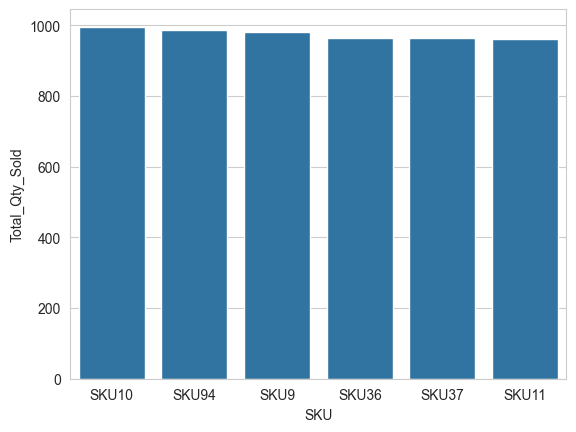

In [90]:
sns.barplot(df_sku_sold,x='SKU',y='Total_Qty_Sold')

In [92]:
fig = px.bar(
    df_sku_sold,
    x='SKU',
    y='Total_Qty_Sold',
    text='Total_Qty_Sold',               # show values on top
    title='Total Quantity Sold per SKU',
    color='Total_Qty_Sold',              # optional: color gradient
    color_continuous_scale='Viridis'
)

# Beautification
fig.update_traces(
    texttemplate='%{text:,}',            # formatted numbers with commas
    textposition='outside'
)

fig.update_layout(
    xaxis_title='SKU',
    yaxis_title='Total Quantity Sold',
    title_font=dict(size=18, family='Arial'),
    xaxis_tickangle=-30,
    plot_bgcolor='white',
    yaxis=dict(showgrid=True)
)

fig.show()